In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base  = "/cluster/home/taheeraa/code/master-thesis/01-multi-label/evaluation/inferens-time"

colors_list = ['#BAA4C7', '#FFC8DD', '#FFAFCC', '#BDE0FE']

densenet121_df = pd.read_csv(f'{base}/densenet121_inference_memory_usage.csv')
swin_simim_df = pd.read_csv(f'{base}/swin_simim_inference_memory_usage.csv')
swin_in22k_df = pd.read_csv(f'{base}/swin_in22k_inference_memory_usage.csv')
vit_in1k_df = pd.read_csv(f'{base}/vit_in1k_inference_memory_usage.csv')


In [54]:
data = {
    'Model': ['DenseNet121', 'ViT-IN1K', 'Swin-IN22K', 'Swin-SimMIM'],
    'mAUC': [0.801, 0.791, 0.753, 0.831],
    'CPU latency (s)': [43.835860, 22.240378, 27.451095, 30.885489],
    'CPU average memory allocated (MB)': [940.680859, 1016.273828, 2102.278516, 2101.746484],
    'GPU peak memory allocated (MB)': [3410, 2900, 8095, 8095],
    'GPU latency (ms)': [137, 742, 769, 769],
    'GPU Latency std (ms)': [29, 4, 5, 4]
}

summary_df = pd.DataFrame(data)

# Convert CPU latency to milliseconds
summary_df['CPU latency (ms)'] = summary_df['CPU latency (s)'] * 1000
summary_df['CPU Latency std (ms)'] = [942.632613, 670.856238, 955.495329, 917.354718]

Observations
DenseNet121:

Highest average inference time (~43.84 seconds).
Moderate memory usage (~940.68 MB).
mAUC is 0.801.
ViT:

Lowest average inference time (~22.24 seconds).
Slightly higher memory usage compared to DenseNet121 (~1016.27 MB).
mAUC is slightly lower than DenseNet121 (0.791).
Swin:

Moderate inference time (~27.45 seconds).
Highest memory usage (~2102.28 MB).
Lowest mAUC (0.753).
Swin SimMIM:

Moderate inference time (~30.89 seconds).
High memory usage (~2101.75 MB), similar to Swin.
Highest mAUC (0.831).

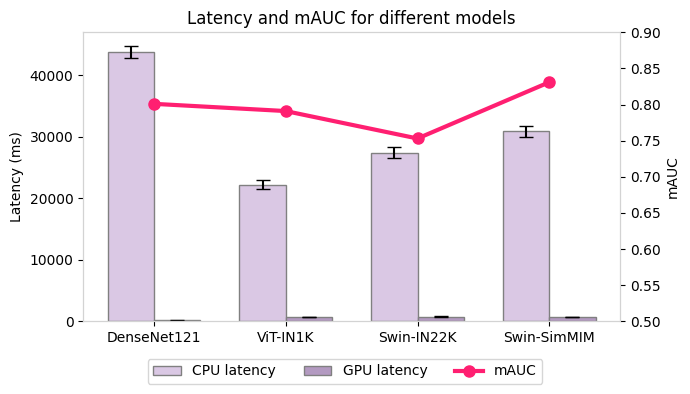

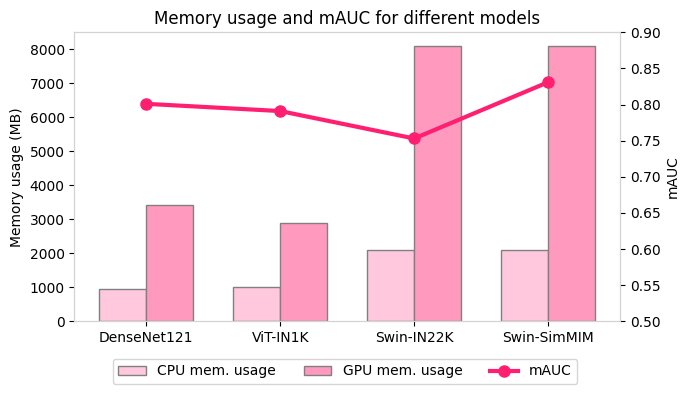

In [102]:
# Define plot style parameters
fig_size = (7, 3.65)  # Wider plots
bar_width = 0.35
opacity = 1
edge_color = 'grey'

# Define colors
cpu_latency_color = "#DAC8E4"
gpu_latency_color = "#B39AC1"
cpu_memory_color = "#FFC8DD"
gpu_memory_color = "#FF99BE"
mauc_color = "#FF1F71"

x = np.arange(len(summary_df['Model']))

# Plotting CPU and GPU latency with the specified style
fig, ax1 = plt.subplots(figsize=fig_size)

ax1.set_ylabel('Latency (ms)')
cpu_bars = ax1.bar(x - bar_width/2, summary_df['CPU latency (ms)'], bar_width, alpha=opacity, color=cpu_latency_color, edgecolor=edge_color, yerr=summary_df['CPU Latency std (ms)'], capsize=5, label='CPU latency')
gpu_bars = ax1.bar(x + bar_width/2, summary_df['GPU latency (ms)'], bar_width, alpha=opacity, color=gpu_latency_color, edgecolor=edge_color, yerr=summary_df['GPU Latency std (ms)'], capsize=5, label='GPU latency')
ax1.set_xticks(x)
ax1.set_xticklabels(summary_df['Model'])
ax1.tick_params(axis='y')

# Plotting mAUC as line
ax2 = ax1.twinx()
ax2.set_ylabel('mAUC')
ax2.plot(x, summary_df['mAUC'], color=mauc_color, marker='o', linestyle='-', linewidth=3, markersize=8, label='mAUC')
ax2.tick_params(axis='y')
ax2.set_ylim(0.5, 0.9)

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.022008), ncol=3)  # Move legend below the plot

for spine in ax1.spines.values():
    spine.set_edgecolor('lightgrey')

for spine in ax2.spines.values():
    spine.set_edgecolor('lightgrey')

plt.title('Latency and mAUC for different models')
plt.savefig("latency-mauc-gpu-cpu.png")
plt.tight_layout()
plt.show()

# Plotting CPU and GPU memory usage with the specified style
fig, ax1 = plt.subplots(figsize=fig_size)

ax1.set_ylabel('Memory usage (MB)')
cpu_bars = ax1.bar(x - bar_width/2, summary_df['CPU average memory allocated (MB)'], bar_width, alpha=opacity, color=cpu_memory_color, edgecolor=edge_color, label='CPU mem. usage')
gpu_bars = ax1.bar(x + bar_width/2, summary_df['GPU peak memory allocated (MB)'], bar_width, alpha=opacity, color=gpu_memory_color, edgecolor=edge_color, label='GPU mem. usage')
ax1.set_xticks(x)
ax1.set_xticklabels(summary_df['Model'])
ax1.tick_params(axis='y')

# Plotting mAUC as line
ax2 = ax1.twinx()
ax2.set_ylabel('mAUC')
ax2.plot(x, summary_df['mAUC'], color=mauc_color, marker='o', linestyle='-', linewidth=3, markersize=8, label='mAUC')
ax2.tick_params(axis='y')
ax2.set_ylim(0.5, 0.9)

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.022008), ncol=3)  # Move legend below the plot

for spine in ax1.spines.values():
    spine.set_edgecolor('lightgrey')

for spine in ax2.spines.values():
    spine.set_edgecolor('lightgrey')

plt.title('Memory usage and mAUC for different models')
plt.savefig("memory-mauc-gpu-cpu.png")
plt.tight_layout()
plt.show()